# Predator & Prey

## Agent Based

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import itertools as itr
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

np.random.seed(42)

In [298]:
def plotStats(stats):
    plt.figure(figsize=(12, 6))
    t = np.arange(0, len(stats))
    plt.plot(t, stats[:,0], 'r-d', label="Wolfs")
    plt.plot(t, stats[:,1], 'b-o', label="Rabbits")
    plt.xlabel('Iterations')
    #plt.xticks(np.arange(0, len(stats)))
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
#def plotWorld(H, L):
def plotWorld(i, pop):
    L = pop[i][0]
    H = pop[i][1]
    if (len(L) > 0):
        plt.scatter(L[:, 0] -.5, L[:, 1]-.5, c='r', s=100, marker='d', label="Wolfs")
    if (len(H) > 0):
        plt.scatter(H[:, 0] -.5, H[:, 1] -.5, c='b', label="Rabbits")
    plt.xticks(np.arange(0, N))
    plt.yticks(np.arange(0, N))    
    plt.grid()
    plt.show()

In [4]:
def plotWorlds(i=0):
    slider = widgets.IntSlider(value=0, min=0, max=len(pop)-1, step=1, description='Time step:', 
                               continuous_update=False, readout=True, readout_format='d')
    
    widgets.interact(plotWorld, pop=widgets.fixed(pop), i=slider)

In [5]:
def plotLH(stats):
    plt.plot(stats[:,0], stats[:,1])
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    plt.show()

In [6]:
def plotHDeads(H_deads):
    plt.plot(H_deads)
    plt.xlabel("Iterations")
    plt.ylabel("Dead Rabbits")
    plt.show()

In [139]:
def plotZ(Z):
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    plt.plot(Z[:,0], Z[:,1])
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    #plt.title("Poblations")
    plt.subplot(2, 2, 2)
    sc = plt.scatter(Z[:,0], Z[:,1], c=Z[:, 2])
    plt.colorbar(sc)
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbits")
    #plt.title("Poblations and rabbit deaths")
    plt.subplot(2, 2, 3)
    plt.plot(Z[:,0], Z[:,2], 'r')
    plt.xlabel("Wolfs")
    plt.ylabel("Rabbit deaths")
    plt.subplot(2, 2, 4)    
    plt.plot(Z[:,1], Z[:,2], 'g')
    plt.xlabel("Rabbits")
    plt.ylabel("Rabbit deaths")
    plt.show()

In [7]:
# Predator and prey movement    
def moveL(L): 
    return (L + np.round(np.random.uniform(-3, 3, size=L.shape))) % N

def moveH(H): 
    return (H + np.round(np.random.uniform(-2, 2, size=H.shape))) % N
    
# Repoduction
def reproduce(P, prob):
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            #P = np.vstack((P, [P[i]]))            
            P = np.vstack((P, np.random.randint(N, size=2)))
    return P

# Death prey
def death(P, prob):
    rp = []
    for i in range(len(P)):
        if (np.random.uniform(0, 1) <= prob):
            rp.append(i)
    return np.delete(P, rp, axis=0)

# Check if wolf eats
#@jit(nopython=True)
def checkFood(L, H, d, probEat, probRep):
    #Hl = list(H)
    #Ll = list(L)
    for l in L: # Foreach wolf
        pos = 0 
        for h in H: # Foreach rabbit
            # If rabbit is inside a wolf neighborhood
            if np.linalg.norm(l-h, ord=1) <= d: 
            #if norm(l-h) <= d:
                if (np.random.uniform(0, 1) <= probEat): # Random eat
                    H = np.delete(H, [pos], axis=0) # Remove rabbit
                    pos -= 1
                    #Hl = Hl.remove(h)
                    # Reproduce wolf if it eats
                    if (np.random.uniform(0, 1) <= probRep):
                        L = np.vstack((L, [l]))
                        #Ll = Ll.append(l)
                        
                    break
            pos += 1 # pos to handle the rabbits' removal
    return L, H

In [8]:
# Parameters
N = 50 #40 # World size
Prc = 1e-1 # Probability of rabbit's reproduction or birth
Pdl = 8e-2 # Probability of wolf's death
Prl = 4e-1 # Probability of wolf's reproduction or birth
Pcl = 5e-1 # Probability of wolf's feeding
d = 2 # Distance for wolf eating

NL = 20 # Number of wolfs
NH = 55 # Number of rabbits

# Iterations
N_iter = 500    

In [9]:
def simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter):
    # Random wolfs and rabbits positions
    L = np.random.randint(N, size=(NL, 2))
    H = np.random.randint(N, size=(NH, 2))
    
    stats = [[NL, NH]]
    pop = []
    H_deads = []
    
    for i in range(1, N_iter + 1):
        L = moveL(L) # Move wolfs
        H = moveH(H) # Move rabbits
        H = reproduce(H, Prc) # Reproduce rabbits
        H_old = len(H)
        L, H = checkFood(L, H, d, Pcl, Prl) # Wolfs eat rabbits
        H_deads.append(H_old - len(H))
        L = death(L, Pdl) # Wolfs death after time        
        

        # Append stats
        stats.append([len(L), len(H)])
        pop.append([L, H])

        # Show world status
        #plotWorld(H, L)

        # Stop iterations 
        if (len(H) >= 0 and len(L) == 0):
            break
            
    return np.array(pop), np.array(stats), np.array(H_deads)

In [10]:
pop, stats, deads = simulation(N, NL, NH, Prc, Pdl, Prl, Pcl, d, N_iter)

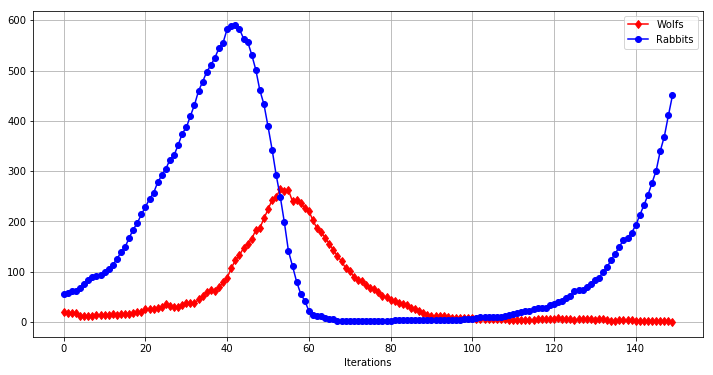

In [11]:
# Show stats
plotStats(np.array(stats))

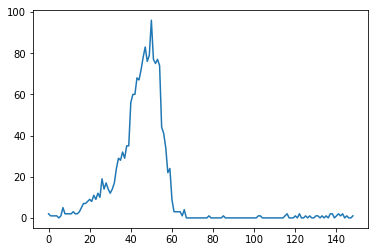

In [12]:
plt.plot(deads)
plt.show()

## Funcion muerte de conejos

In [79]:
NL_set = np.arange(18, 28)#(10, 30)
NH_set = np.arange(53, 57)#(40, 60)

pops = []
stats = []
hds = []

In [80]:
for e in itr.product(NL_set, NH_set):
    pop, st, deads = simulation(N, e[0], e[1], Prc, Pdl, Prl, Pcl, d, N_iter)
    pops.append(pop)
    stats.append(st)
    hds.append(deads)

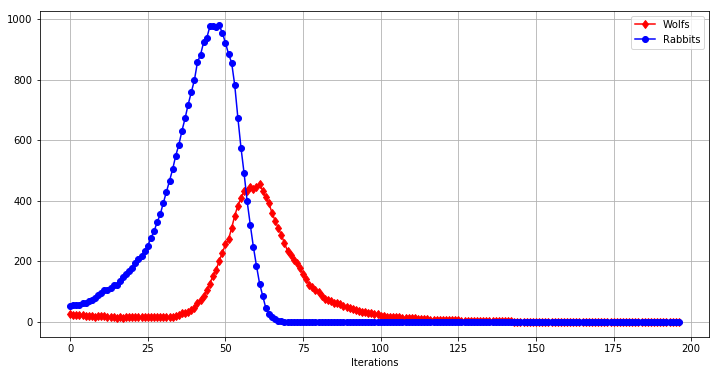

In [122]:
plotStats(np.array(stats[33]))

In [81]:
def createTriple(stats, hds):
    N = len(stats)
    
    Z = []
    XY = []
    
    
    for i in range(N):
        S = stats[i]
        D = hds[i]
        M = len(D)
        for j in range(M):
            xy = [S[j+1][0], S[j+1][1]] 
            
            if xy not in XY:
                XY.append(xy)
                Z.append([D[j]])
            else:
                k = XY.index(xy)
                Z[k].append(D[j])
    
    data = np.zeros((len(Z), 3))    
    
    for t in range(len(Z)):

        data[t, 0] = XY[t][0]
        data[t, 1] = XY[t][1]
        data[t, 2] = float(np.array(Z[t]).mean())

    return data#np.array(data)#Z#np.array(Z)

In [82]:
Z = createTriple(stats, hds)

In [112]:
np.save('data.npy', Z)

In [ ]:
#Z = np.load('data.npy')

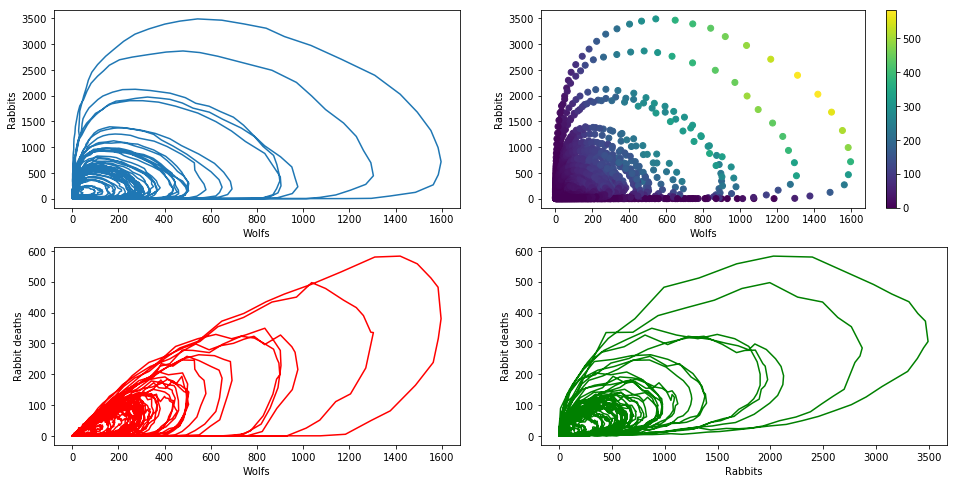

In [140]:
plotZ(Z)

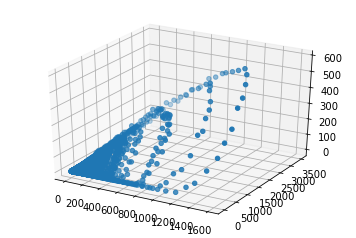

In [141]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(Z[:,0], Z[:,1], Z[:, 2], color='b')
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
plt.show()

In [89]:
from scipy import interpolate
f = interpolate.interp2d(Z[:,0], Z[:,1], Z[:, 2], kind='cubic')

/home/dsanmartin/anaconda3/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=27,31 m=4134 fp=38734.354403 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [143]:
Z

array([[ 17.,  55.,   2.],
       [ 16.,  56.,   4.],
       [ 15.,  57.,   2.],
       ..., 
       [  5.,   7.,   0.],
       [  4.,   8.,   0.],
       [  0.,  17.,   0.]])

In [145]:
from scipy.interpolate import Rbf

rbfi = Rbf(Z[:,0], Z[:,1], Z[:, 2])  # radial basis function interpolator instance
xi = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]))
yi = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]))
zi = rbfi(xi, yi)   # interpolated values

/home/dsanmartin/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.971051550298334e-24
  ' condition number: {}'.format(rcond), RuntimeWarning)


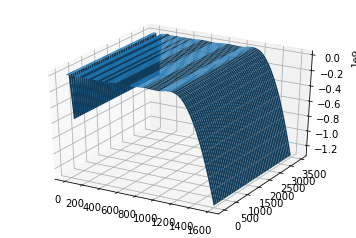

In [146]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xi, yi)
#ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.plot_surface(X, Y, zi)
plt.show()

100
100


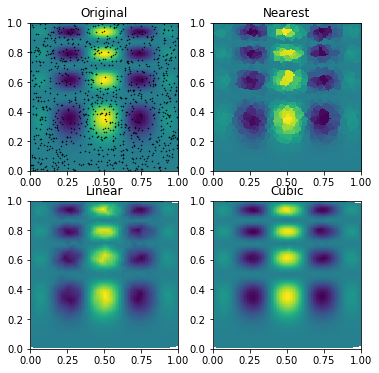

In [167]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
print(len(grid_x))
print(len(grid_y))

points = np.random.rand(1000, 2)
#print(points)
values = func(points[:,0], points[:,1])
#print(values)

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

In [182]:
from scipy.interpolate import griddata
grid_x, grid_y = np.mgrid[np.min(Z[:,0]):np.max(Z[:,0]):100j, np.min(Z[:,1]):np.max(Z[:,1]):100j]
grid_z0 = griddata(Z[:,0:2], Z[:, 2], (grid_x, grid_y), method='linear')

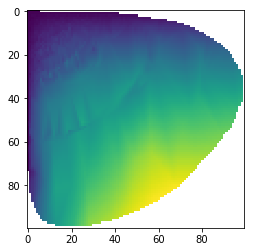

In [184]:
plt.imshow(grid_z0)
plt.show()

In [256]:
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator, SmoothBivariateSpline
LI = LinearNDInterpolator(Z[:,0:2], Z[:, 2])
NI = NearestNDInterpolator(Z[:,0:2], Z[:, 2])

0.0 580.0


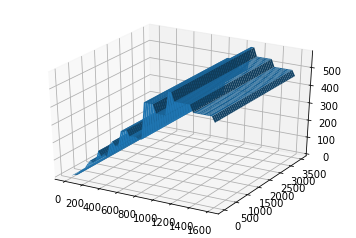

In [262]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(Z[:,0], Z[:,1], Z[:, 2], color='b')
x = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]))
y = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]))
X, Y = np.meshgrid(x, y)
F = NI(x, y)
#ax.scatter(Z[:,0], Z[:,1], Z[:,2])
print(np.min(F), np.max(F))
ax.plot_surface(X, Y, F)
plt.show()

In [259]:
for i in range(10):
    print(Z[i])
    print(NI(Z[i, :2]))

[ 17.  55.   2.]
[ 2.]
[ 16.  56.   4.]
[ 4.]
[ 15.  57.   2.]
[ 2.]
[ 15.  60.   2.]
[ 2.]
[ 14.  64.   0.]
[ 0.]
[ 13.  67.   3.]
[ 3.]
[ 12.  75.   2.]
[ 2.]
[ 11.  81.   1.]
[ 1.]
[ 11.          91.           1.33333333]
[ 1.33333333]
[ 11.  99.   2.]
[ 2.]


In [260]:
NI(0.55, 65.2)

0.0

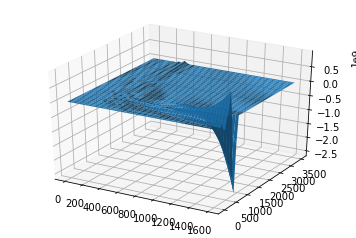

In [261]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(Z[:,0], Z[:,1], Z[:, 2], color='b')
x = np.linspace(np.min(Z[:,0]), np.max(Z[:,0]))
y = np.linspace(np.min(Z[:,1]), np.max(Z[:,1]))
X, Y = np.meshgrid(x, y)
F = f(x, y)
#ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.plot_surface(X, Y, F)
plt.show()

## Modelo 2

In [295]:
def plot2Pop(i, H, L):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(L[i])
    plt.title("Wolfs")
    plt.subplot(1, 2, 2)
    #sc = plt.scatter(Z[:,0], Z[:,1], c=Z[:, 2])
    #plt.colorbar(sc)
    plt.imshow(H[i])
    plt.title("Rabbits")
    plt.show()

In [296]:
def plotPopTime(i=0):
    slider = widgets.IntSlider(value=0, min=0, max=len(L)-1, step=1, description='Time step:', 
                               continuous_update=False, readout=True, readout_format='d')
    
    widgets.interact(plot2Pop, H=widgets.fixed(H), L=widgets.fixed(L), i=slider)
    #widgets.interact(plotStats, i=slider)

In [334]:
def simulation2(N, N_iter, Prc, Pdl, Prl, F):
    
    L = np.zeros((N_iter + 1, N, N))
    H = np.zeros((N_iter + 1, N, N))
    
        # Random wolfs and rabbits populations
    L[0] = np.random.randint(0, 100, size=(N, N))
    H[0] = np.random.randint(0, 100, size=(N, N))
    
    stats = [[NL, NH]]
    
    for k in range(1, N_iter + 1):
        for i in range(N):
            for j in range(N):
                H[k, i, j] = H[k-1, i, j] * (1 + Prc) - F(L[k-1, i, j], H[k-1, i, j]) * 1e-14
                L[k, i, j] = L[k-1, i, j] * (1 +  F(L[k-1, i, j], H[k-1, i, j]))*Prl - L[k-1, i, j]*Pdl
        

        stats.append([L[k].sum(), H[k].sum()])
        
            
    return L, H, np.array(stats)

In [347]:
L, H, stats2 = simulation2(40, 10, Prc, Pdl, Prl, NI)

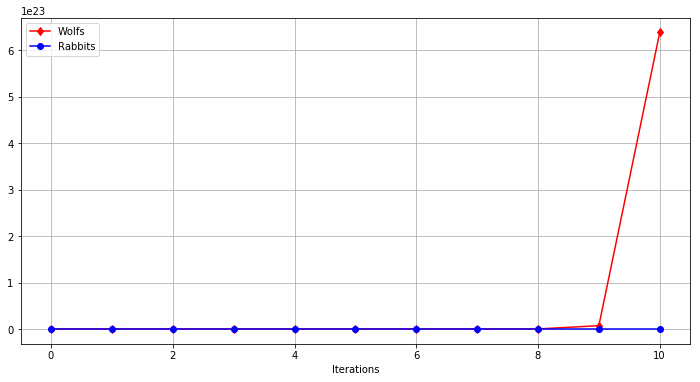

In [348]:
plotStats(stats2)

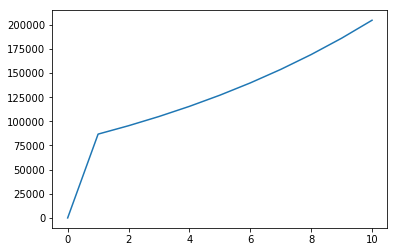

In [350]:
plt.plot(stats2[:,1])
plt.show()

In [316]:
plotPopTime()

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time step:', max=50), Output()), _dom_classes=('widget-interact',))

In [1]:
def plot(X, Y, Z):
    plt.figure(figsize=(10, 6))
    count = plt.contourf(X, Y, Z, cmap=cm.jet)
    plt.colorbar(count)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [7]:
def move(D):
    d = (1/5)*D
    tmp = D + np.roll(d, 1, axis=0) + np.roll(d, -1, axis=0) + np.roll(d, 1, axis=1) + np.roll(d, -1, axis=1)
    return d

In [4]:
N = 100
x = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, x)

NameError: name 'np' is not defined

In [5]:
G = lambda x, y: np.exp(-(x**2 + y**2))

In [3]:
p = lambda x, y: .4*G(2*x, 2*y) + .25*G(1.5*x-1, 1.5*y-1) + .9*G(2*x+5, 2*y+5)

In [ ]:
plot(X, Y, p(X, Y))

In [ ]:
moveFF2 = move(p(X, Y))

In [6]:
plot(X, Y, move2FF2)